# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | On a recent flight from Cy...
1,✅ Trip Verified | Flight BA 0560 arrived in ...
2,✅ Trip Verified | This was the first time I ...
3,✅ Trip Verified | Pretty good flight but sti...
4,"✅ Trip Verified | Check in was fine, but no pr..."


In [ ]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
data = pd.read_csv('BA_reviews.csv', usecols=lambda column: column != 'Unnamed: 0')
data.head()

,reviews
0,✅ Trip Verified | On a recent flight from Cy...
1,✅ Trip Verified | Flight BA 0560 arrived in ...
2,✅ Trip Verified | This was the first time I ...
3,✅ Trip Verified | Pretty good flight but sti...
4,"✅ Trip Verified | Check in was fine, but no pr..."


In [ ]:
data["reviews"] = reviews

In [ ]:
# Removing the data before | symbol

data.reviews = data.reviews.str.split('|',expand=True)[1]

In [ ]:
data

,reviews
0,On a recent flight from Cyprus BA621 on 23/...
1,Flight BA 0560 arrived in Rome on 11 Decemb...
2,This was the first time I flew British Airw...
3,Pretty good flight but still some small thi...
4,"Check in was fine, but no priority/fast track..."
...,...
995,This was the worst experience I have ever had...
996,"London to Larnaca. New A321neo, 4.5 hour fli..."
997,Gatwick to Orlando. Excellent customer servi...
998,London to Munich. The plane is A320. The sea...


###Rule-based approach

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

Data preprocessing steps:

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

### 2. Cleaning text in the Data

In [ ]:
import re

# Define a function to clean the text
def clean_text(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
data['Cleaned Reviews'] = data['reviews'].apply(clean_text)
data.head()

,reviews,Cleaned Reviews
0,On a recent flight from Cyprus BA621 on 23/...,On a recent flight from Cyprus BA on the seco...
1,Flight BA 0560 arrived in Rome on 11 Decemb...,Flight BA arrived in Rome on December where A...
2,This was the first time I flew British Airw...,This was the first time I flew British Airway...
3,Pretty good flight but still some small thi...,Pretty good flight but still some small thing...
4,"Check in was fine, but no priority/fast track...",Check in was fine but no priority fast track ...


###Step 2: Tokenization
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

###Step 3: Enrichment – POS tagging
Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

###Step 4: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

###Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

      NLTK is a leading platform for building Python programs to work with human language data.

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along
with a suite of text processing libraries for classification, tokenization, stemming, tagging,
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries

In [ ]:
!pip install nltk

In [ ]:

import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.

nltk.download('omw-1.4')
# Download the required resource
nltk.download('averaged_perceptron_tagger_eng')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

data['POS tagged'] = data['Cleaned Reviews'].apply(token_stop_pos)
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,On a recent flight from Cyprus BA621 on 23/...,On a recent flight from Cyprus BA on the seco...,"[(recent, a), (flight, n), (Cyprus, n), (BA, n..."
1,Flight BA 0560 arrived in Rome on 11 Decemb...,Flight BA arrived in Rome on December where A...,"[(Flight, n), (BA, n), (arrived, v), (Rome, n)..."
2,This was the first time I flew British Airw...,This was the first time I flew British Airway...,"[(first, a), (time, n), (flew, v), (British, a..."
3,Pretty good flight but still some small thi...,Pretty good flight but still some small thing...,"[(Pretty, r), (good, a), (flight, n), (still, ..."
4,"Check in was fine, but no priority/fast track...",Check in was fine but no priority fast track ...,"[(Check, n), (fine, a), (priority, n), (fast, ..."


In [ ]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

data['Lemma'] = data['POS tagged'].apply(lemmatize)
data.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,On a recent flight from Cyprus BA621 on 23/...,On a recent flight from Cyprus BA on the seco...,"[(recent, a), (flight, n), (Cyprus, n), (BA, n...",recent flight Cyprus BA second cabin door cl...
1,Flight BA 0560 arrived in Rome on 11 Decemb...,Flight BA arrived in Rome on December where A...,"[(Flight, n), (BA, n), (arrived, v), (Rome, n)...",Flight BA arrive Rome December passengers re...
2,This was the first time I flew British Airw...,This was the first time I flew British Airway...,"[(first, a), (time, n), (flew, v), (British, a...",first time fly British Airways huge disappoi...
3,Pretty good flight but still some small thi...,Pretty good flight but still some small thing...,"[(Pretty, r), (good, a), (flight, n), (still, ...",Pretty good flight still small thing improve...
4,"Check in was fine, but no priority/fast track...",Check in was fine but no priority fast track ...,"[(Check, n), (fine, a), (priority, n), (fast, ...",Check fine priority fast track line security...


In [ ]:
data[['reviews','Lemma']]

,reviews,Lemma
0,On a recent flight from Cyprus BA621 on 23/...,recent flight Cyprus BA second cabin door cl...
1,Flight BA 0560 arrived in Rome on 11 Decemb...,Flight BA arrive Rome December passengers re...
2,This was the first time I flew British Airw...,first time fly British Airways huge disappoi...
3,Pretty good flight but still some small thi...,Pretty good flight still small thing improve...
4,"Check in was fine, but no priority/fast track...",Check fine priority fast track line security...
...,...,...
995,This was the worst experience I have ever had...,bad experience ever fly sufficient time Chic...
996,"London to Larnaca. New A321neo, 4.5 hour fli...",London Larnaca New neo hour flight aircraft ...
997,Gatwick to Orlando. Excellent customer servi...,Gatwick Orlando Excellent customer service a...
998,London to Munich. The plane is A320. The sea...,London Munich plane seat comfortable airline...


In [ ]:
!pip install transformers torch

In [ ]:
from transformers import XLNetTokenizer, XLNetForSequenceClassification
from transformers import pipeline
import torch

# Load pre-trained XLNet model and tokenizer
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
model = XLNetForSequenceClassification.from_pretrained('xlnet-base-cased', num_labels=2)

# Initialize sentiment-analysis pipeline
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Function to perform sentiment analysis using XLNet
def xlnetsentimentanalysis(review):
    # Use XLNet model to predict sentiment
    result = nlp(review)
    return result[0]['label']

# Applying the function to the 'Lemma' column
data['Sentiment'] = data['Lemma'].apply(xlnetsentimentanalysis)

# Mapping sentiment results to 'Positive', 'Negative', or 'Neutral'
def xlnet_analysis(sentiment):
    if sentiment == 'LABEL_1':  # XLNet's sentiment label is often 0 or 1 for binary sentiment (adjust if necessary)
        return 'Positive'
    else:
        return 'Negative'

# Apply the analysis function to get 'Positive' or 'Negative' sentiment
data['Analysis'] = data['Sentiment'].apply(xlnet_analysis)


Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu


In [ ]:
data.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,On a recent flight from Cyprus BA621 on 23/...,On a recent flight from Cyprus BA on the seco...,"[(recent, a), (flight, n), (Cyprus, n), (BA, n...",recent flight Cyprus BA second cabin door cl...,LABEL_1,Positive
1,Flight BA 0560 arrived in Rome on 11 Decemb...,Flight BA arrived in Rome on December where A...,"[(Flight, n), (BA, n), (arrived, v), (Rome, n)...",Flight BA arrive Rome December passengers re...,LABEL_1,Positive
2,This was the first time I flew British Airw...,This was the first time I flew British Airway...,"[(first, a), (time, n), (flew, v), (British, a...",first time fly British Airways huge disappoi...,LABEL_0,Negative
3,Pretty good flight but still some small thi...,Pretty good flight but still some small thing...,"[(Pretty, r), (good, a), (flight, n), (still, ...",Pretty good flight still small thing improve...,LABEL_1,Positive
4,"Check in was fine, but no priority/fast track...",Check in was fine but no priority fast track ...,"[(Check, n), (fine, a), (priority, n), (fast, ...",Check fine priority fast track line security...,LABEL_0,Negative


In [ ]:
result_counts = data['Analysis'].value_counts()
result_counts

,count
Analysis,
Positive,611
Negative,389


([<matplotlib.patches.Wedge at 0x7c217e0e26b0>,
 [Text(-0.3758613233265852, 1.0337931445057993, 'Positive'),
  Text(0.46128435135535484, -1.2687461318934807, 'Negative')],
 [Text(-0.20501526726904643, 0.563887169730436, '61.1%'),
  Text(0.290438295297816, -0.7988401571181174, '38.9%')])

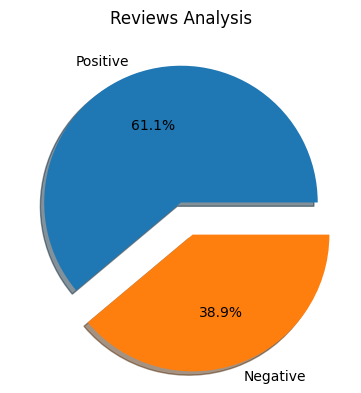

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(result_counts.values, labels = result_counts.index, explode = (0,0.25), autopct='%1.1f%%', shadow=True)


In [ ]:
data.to_csv("final_BA_reviews.csv")

## WordCloud

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

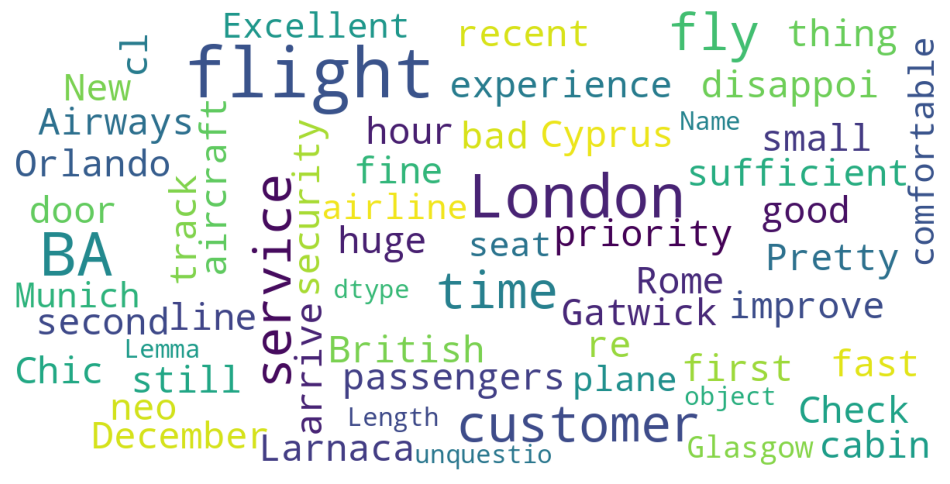

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(data.Lemma)